### Text PreProcessing

In [2]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset('ag_news', split='train[:1%]')  # Load only 1% for lightweight usage
# Dataset Card for "ag_news" Dataset Summary AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources
df = pd.DataFrame({'doc_id': range(len(dataset)), 'description': dataset['text']})
print(df.head())


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

   doc_id                                        description
0       0  Wall St. Bears Claw Back Into the Black (Reute...
1       1  Carlyle Looks Toward Commercial Aerospace (Reu...
2       2  Oil and Economy Cloud Stocks' Outlook (Reuters...
3       3  Iraq Halts Oil Exports from Main Southern Pipe...
4       4  Oil prices soar to all-time record, posing new...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   doc_id       1200 non-null   int64 
 1   description  1200 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


##### Removing Stopwords:

Stopwords are common words (like "the" and "is") that don’t add much meaning in analysis. By removing them, we highlight the important words that carry the actual message. Using NLTK’s English stopwords, we filter out these unnecessary terms, storing the result in a new column, no_stopwords.



In [4]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    if isinstance(text, str):


        words=text.split()
        words=[word for word in words if word.lower() not in stop_words]
        cleaned_text = ' '.join(words)

        return cleaned_text
    else:
            return "" 


In [6]:
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['no_stopwords']=df['description'].apply(remove_stopwords)
df[['description', 'no_stopwords']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,no_stopwords
0,Wall St. Bears Claw Back Into the Black (Reute...,Wall St. Bears Claw Back Black (Reuters) Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Oil Economy Cloud Stocks' Outlook (Reuters) Re...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Iraq Halts Oil Exports Main Southern Pipeline ...
4,"Oil prices soar to all-time record, posing new...","Oil prices soar all-time record, posing new me..."


##### Removing Punctuation:

Punctuation, while helpful for grammar, often doesn’t add analytical value. The remove_punc function removes it from our text, creating cleaner entries and making it easier to identify meaningful patterns in further analysis. The cleaned result is saved in no_stopwords_and_punct.



In [8]:
import string

def remove_punc(text):
    if isinstance (text,str):
         return text.translate(str.maketrans('', '', string.punctuation))
    else:
        return ""  


In [11]:
df['no_stopwords_and_punct'] = df['no_stopwords'].apply(remove_punc)

df[['no_stopwords', 'no_stopwords_and_punct']].head() 


,no_stopwords,no_stopwords_and_punct
0,Wall St. Bears Claw Back Black (Reuters) Reute...,Wall St Bears Claw Back Black Reuters Reuters ...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Carlyle Looks Toward Commercial Aerospace Reut...
2,Oil Economy Cloud Stocks' Outlook (Reuters) Re...,Oil Economy Cloud Stocks Outlook Reuters Reute...
3,Iraq Halts Oil Exports Main Southern Pipeline ...,Iraq Halts Oil Exports Main Southern Pipeline ...
4,"Oil prices soar all-time record, posing new me...",Oil prices soar alltime record posing new mena...


##### Stemming Words:

Stemming reduces words to their root forms (like "running" to "run"). This generalization can improve the consistency of terms, especially in cases where we care about the concept of a word rather than its specific form. We apply this to the no_stopwords_and_punct column, saving the output as no_stpwrd_punc_and_stemmed.



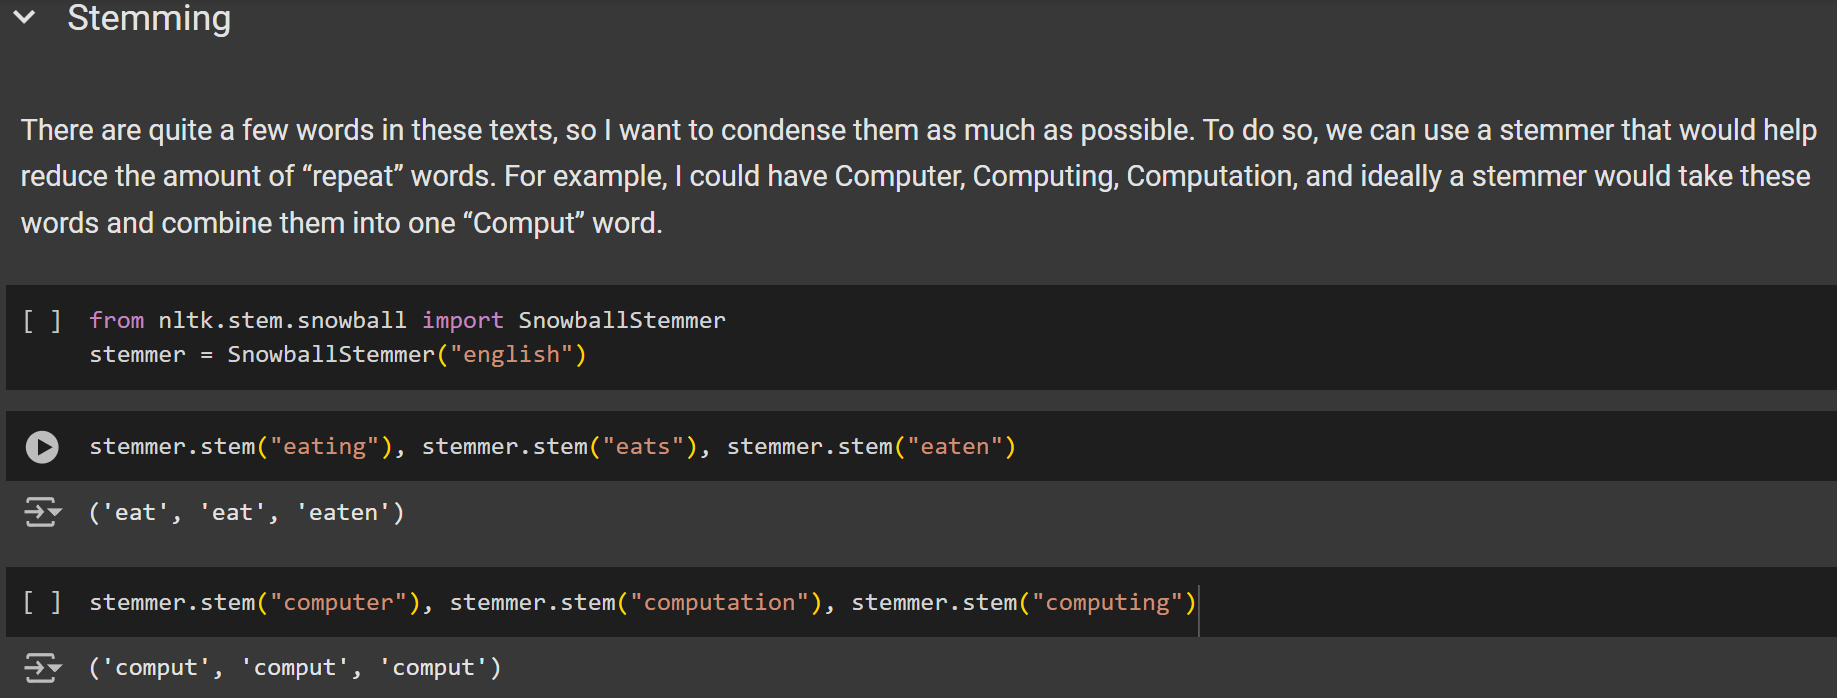

In [12]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

def apply_stemming(text):
    words= text.split()
    stemmed_words=[stemmer.stem(word) for word in words]
    stemmed_text=' '.join(stemmed_words)
    return stemmed_text


In [13]:
df['no_stpwrd_punc_and_stemmed'] = df['no_stopwords_and_punct'].apply(apply_stemming)

df[[ 'no_stopwords_and_punct', 'no_stpwrd_punc_and_stemmed']].head()


,no_stopwords_and_punct,no_stpwrd_punc_and_stemmed
0,Wall St Bears Claw Back Black Reuters Reuters ...,wall st bear claw back black reuter reuter sho...
1,Carlyle Looks Toward Commercial Aerospace Reut...,carlyl look toward commerci aerospac reuter re...
2,Oil Economy Cloud Stocks Outlook Reuters Reute...,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports Main Southern Pipeline ...,iraq halt oil export main southern pipelin reu...
4,Oil prices soar alltime record posing new mena...,oil price soar alltim record pose new menac us...


##### Lemmatizing Words:

Unlike stemming, lemmatization returns words to their actual dictionary form (e.g., "better" becomes "good"), which improves readability and consistency. We apply lemmatization to create a new column, lemmatized_text


In [14]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    text = text.lower()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)  
    return lemmatized_text


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emanu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df['lemmatized_text'] = df['no_stopwords_and_punct'].apply(apply_lemmatization)
df[['no_stopwords_and_punct', 'lemmatized_text']].head()


,no_stopwords_and_punct,lemmatized_text
0,Wall St Bears Claw Back Black Reuters Reuters ...,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace Reut...,carlyle look toward commercial aerospace reute...
2,Oil Economy Cloud Stocks Outlook Reuters Reute...,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports Main Southern Pipeline ...,iraq halt oil export main southern pipeline re...
4,Oil prices soar alltime record posing new mena...,oil price soar alltime record posing new menac...


In [16]:
df[[ 'lemmatized_text', 'no_stpwrd_punc_and_stemmed']].head()
# you can use either one of those methods

,lemmatized_text,no_stpwrd_punc_and_stemmed
0,wall st bear claw back black reuters reuters s...,wall st bear claw back black reuter reuter sho...
1,carlyle look toward commercial aerospace reute...,carlyl look toward commerci aerospac reuter re...
2,oil economy cloud stock outlook reuters reuter...,oil economi cloud stock outlook reuter reuter ...
3,iraq halt oil export main southern pipeline re...,iraq halt oil export main southern pipelin reu...
4,oil price soar alltime record posing new menac...,oil price soar alltim record pose new menac us...


In this case I think lemmatize is slightly more clear

##### Removing Extra Spaces:

As a side effect of all the text manipulations, extra spaces can appear, which disrupts the flow of clean data. We fix this with a regular expression to ensure neat, evenly spaced text.

##### Removing Non-ASCII Characters and Emojis:

Special characters and emojis often don’t add value in analysis, so we remove them by re-encoding text to ASCII. This keeps everything in a standard English character set, reducing noise.

##### Expanding Contractions:

Expanding contractions (like changing "don’t" to "do not") improves readability and clarity in text analysis, helping algorithms better understand the meaning. We apply this to make the text more complete and user-friendly.



In [18]:
import contractions

df['lemmatized_text+'] = df['lemmatized_text'].str.replace(r'\s+', ' ', regex=True).str.strip() # Remove extra spaces

df['cleaned_text'] = df['lemmatized_text+'].str.encode('ascii', 'ignore').str.decode('ascii') # Remove non-ASCII characters

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: contractions.fix(x)) # Expand contractions

df['cleaned_text'] = df['cleaned_text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True) # Remove URLs

df['cleaned_text'] = df['cleaned_text'].str.replace(r'\S+@\S+', '', regex=True) # Remove emails

display(df['cleaned_text'])

0       wall st bear claw back black reuters reuters s...
1       carlyle look toward commercial aerospace reute...
2       oil economy cloud stock outlook reuters reuter...
3       iraq halt oil export main southern pipeline re...
4       oil price soar alltime record posing new menac...
                              ...                        
1195    airline look delay pension payment effort cons...
1196    mcdonalds go gold fouryear investment estimate...
1197    auction share google ipo may end today washing...
1198    four firm buy intelsat intelsat ltd pioneering...
1199    auction share google ipo may end google inc in...
Name: cleaned_text, Length: 1200, dtype: object

### Conjunctive Query
Create Your Index!

In this part of our project, we're creating a unique vocabulary and an inverted index.
This approach helps us quickly look up which documents contain specific terms, making search and retrieval much faster and more efficient. Here's a breakdown of each step:

Creating Unique Document IDs:

We assign a unique document ID to each entry in our DataFrame by setting document_id equal to each entry's index. This gives each term a distinct identifier, making it easy to refer back to specific entries later in our inverted index.


In [ ]:
from collections import defaultdict
# Build Vocabulary and Inverted Index
vocabulary = {}
inverted_index = defaultdict(list) # default value is an empty list
term_id_counter = 1

# TermID allows that each word has a unique ID, which we can use as a key in our inverted index
for doc_id, doc in df['cleaned_text'].items(): # iterate over the documents
    tokens = doc.split() # split the document into tokens
    for token in tokens: # iterate over
        if token not in vocabulary: # if the token is new
            vocabulary[token] = term_id_counter # assign a new term ID
            term_id_counter += 1 
        term_id = vocabulary[token] # else get the term ID
        if doc_id not in inverted_index[term_id]: # add the document ID to the posting list
            inverted_index[term_id].append(doc_id) # if it's not already there

vocab_df = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Term_ID']) 
vocab_df.to_csv('vocabulary.csv', index=False)

print("Vocabulary:")
display(vocab_df.head())

print("\nInverted Index (Sample):")
for term_id, doc_ids in list(inverted_index.items())[:5]:
    print(f"Term_ID {term_id}: Documents {doc_ids}")


Vocabulary:


,Word,Term_ID
0,wall,1
1,st,2
2,bear,3
3,claw,4
4,back,5



Inverted Index (Sample):
Term_ID 1: Documents [0, 9, 177, 215, 806, 821, 858, 882, 886, 915, 954, 1015, 1036, 1077, 1115, 1181]
Term_ID 2: Documents [0, 9, 405, 460, 538, 689, 715, 744, 1170]
Term_ID 3: Documents [0, 9, 541, 544, 1074]
Term_ID 4: Documents [0, 9]
Term_ID 5: Documents [0, 7, 9, 52, 110, 116, 232, 259, 268, 288, 466, 475, 509, 547, 558, 562, 574, 606, 613, 627, 628, 641, 653, 658, 688, 934, 1036, 1057, 1090, 1108, 1109, 1127, 1190]


Inverted index will serve us to process search queries. This allows us to efficiently retrieve what we need based on keyword searches.


### Conjunctive Query Function

1. It preprocesses the query to get term IDs.
2. Then, it finds document IDs that contain all the query terms, using set intersections to narrow down the matches.


In [33]:
import re

stop_words = set(stopwords.words('english'))

# Preprocessing Function for Queries
def preprocess_query(query):
    # Lowercase the query
    query = query.lower()
    
    # Remove non-ASCII characters
    query = query.encode('ascii', 'ignore').decode('ascii')
    
    # Remove URLs, Emails, and Special Characters
    query = re.sub(r'http\S+|www\S+|https\S+', '', query)  # Remove URLs
    query = re.sub(r'\S+@\S+', '', query)  # Remove Emails
    query = re.sub(r'[^a-z0-9\s]', '', query)  # Remove special characters and punctuation
    
    # Normalize whitespaces
    query = re.sub(r'\s+', ' ', query).strip()
    
    # Tokenization
    tokens = query.split()
    
    # Remove Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Return cleaned query as a string
    return ' '.join(tokens)

# Sample Queries
queries = [
    "machine learning",
    "space exploration",
    "financial crisis",
    "rareword123",
    "new AI model",
    "nonexistentword",
    "healthcare pandemic",
    "advanced algorithm efficiency",
    "customer service complaint",
    "café résumé naïve",
    "emoji day 🚀",
    "huge spaces between words"
]

preprocessed_queries = [preprocess_query(query) for query in queries]

print("🧹 Preprocessed Queries:")
for i, (original, cleaned) in enumerate(zip(queries, preprocessed_queries)):
    print(f"{i+1}. Original: '{original}' → Cleaned: '{cleaned}'")


🧹 Preprocessed Queries:
1. Original: 'machine learning' → Cleaned: 'machine learning'
2. Original: 'space exploration' → Cleaned: 'space exploration'
3. Original: 'financial crisis' → Cleaned: 'financial crisis'
4. Original: 'rareword123' → Cleaned: 'rareword123'
5. Original: 'new AI model' → Cleaned: 'new ai model'
6. Original: 'nonexistentword' → Cleaned: 'nonexistentword'
7. Original: 'healthcare pandemic' → Cleaned: 'healthcare pandemic'
8. Original: 'advanced algorithm efficiency' → Cleaned: 'advanced algorithm efficiency'
9. Original: 'customer service complaint' → Cleaned: 'customer service complaint'
10. Original: 'café résumé naïve' → Cleaned: 'caf rsum nave'
11. Original: 'emoji day 🚀' → Cleaned: 'emoji day'
12. Original: 'huge spaces between words' → Cleaned: 'huge spaces words'


In [34]:
# Conjunctive Query Function
def conjunctive_query(query, vocabulary, inverted_index):
    query_tokens = query.split() # tokenize the query
    query_term_ids = [vocabulary[token] for token in query_tokens if token in vocabulary] # get term IDs
    
    if not query_term_ids: # if no valid term IDs are found
        return [] # return an empty result

    doc_lists = [set(inverted_index[term_id]) for term_id in query_term_ids] # get posting lists
    result_docs = set.intersection(*doc_lists) if doc_lists else set() # find common documents
     
    return list(result_docs)


# Run Conjunctive Query for each
for query in preprocessed_queries:
    result = conjunctive_query(query, vocabulary, inverted_index)
    print(f"\nQuery: '{query}' → Matching Document Indices: {result}")
    for idx in result:
        print(f"Doc {idx}: {df['cleaned_text'][idx]}")



Query: 'machine learning' → Matching Document Indices: []

Query: 'space exploration' → Matching Document Indices: [281, 102]
Doc 281: japanese lunar probe mission facing delay tokyo ap lunar orbiter japan planned launch year could face delay possibly next year later funding shortfall problem developing probe informationgathering capability japan space agency said wednesday japan aerospace exploration agency jaxa released report governmentrun commission explaining expected delay launch 135 million lunara probe
Doc 102: redesigning rocket nasa space propulsion find new home spacecom spacecom exploration moon planet solar system nbspexciting first task astronaut robot alike actually nbspget destination

Query: 'financial crisis' → Matching Document Indices: []

Query: 'rareword123' → Matching Document Indices: []

Query: 'new ai model' → Matching Document Indices: []

Query: 'nonexistentword' → Matching Document Indices: []

Query: 'healthcare pandemic' → Matching Document Indices: [101

### Ranked Search Engine with TF-IDF and Cosine Similarity

In this analysis, we use the *CountVectorizer* from scikit-learn purely for analytical purposes, infact later in the section we have developed our customed function to rank documents based on cosine_similarity above the TF-IDF scores. The CountVectorizer is used to extract bi-grams (sequences of two consecutive words) from the textual data in the description column of the dataset. We wanna underline the difference between the two histograms below where on the left we consider the raw description column, while on the right wewill consider the preprocessed description column.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def visualize_frequency(df):
    """
    Plots the bar plot of the most frequent bi-grams of the text before and after preprocessing
    
    Args (DataFrame): Input DataFrame

    """
    # Initialize the CountVectorizer for bi-grams (ngram_range=(2, 2))
    vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
    X_bigrams = vectorizer_bigrams.fit_transform(df['description'].dropna())

    # Sum the occurrences of each bi-gram
    sum_bigrams = X_bigrams.sum(axis=0)
    bigrams_freq = [(word, sum_bigrams[0, idx]) for word, idx in vectorizer_bigrams.vocabulary_.items()]
    bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:20]

    # Get the bi-grams and their counts
    bigrams, bigram_counts = zip(*bigrams_freq)

    # Initialize the CountVectorizer for bigrams of the preprocessed text
    vectorizer_preprocessed = CountVectorizer(ngram_range=(2, 2), stop_words = "english")
    X_bigrams_preprocessed = vectorizer_preprocessed.fit_transform(df['cleaned_text'].dropna())

    # Sum the occurrences of each bi-gram
    sum_unigrams = X_bigrams_preprocessed.sum(axis=0)
    bigrams_freq_preprocessed = [(word, sum_unigrams[0, idx]) for word, idx in vectorizer_preprocessed.vocabulary_.items()]
    bigrams_freq_preprocessed = sorted(bigrams_freq_preprocessed, key=lambda x: x[1], reverse=True)[:20]

    # Get the bigrams preprocessed and their counts
    bigrams_preprocessed, bigram_preprocessed_counts = zip(*bigrams_freq_preprocessed)

    # Create a palette through seaborn
    palette = sns.color_palette("coolwarm", as_cmap=True)


    # Create subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Plot the bi-grams
    axes[0].bar(bigrams, bigram_counts, color=palette(np.linspace(0, 1, len(bigrams))))
    axes[0].set_xticklabels(bigrams, rotation=90)
    axes[0].set_title('Before Preprocessing')



    # Plot the Preprocessed Bigrams
    axes[1].bar(bigrams_preprocessed, bigram_preprocessed_counts, color="lightgreen")
    axes[1].set_xticklabels(bigrams_preprocessed, rotation=90)
    axes[1].set_title('After Preprocessing')

    fig.suptitle('Top Bi-grams', fontsize=16)

    # Show the plots
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


C:\Users\emanu\AppData\Local\Temp\ipykernel_25656\474375693.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(bigrams, rotation=90)
C:\Users\emanu\AppData\Local\Temp\ipykernel_25656\474375693.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(bigrams_preprocessed, rotation=90)


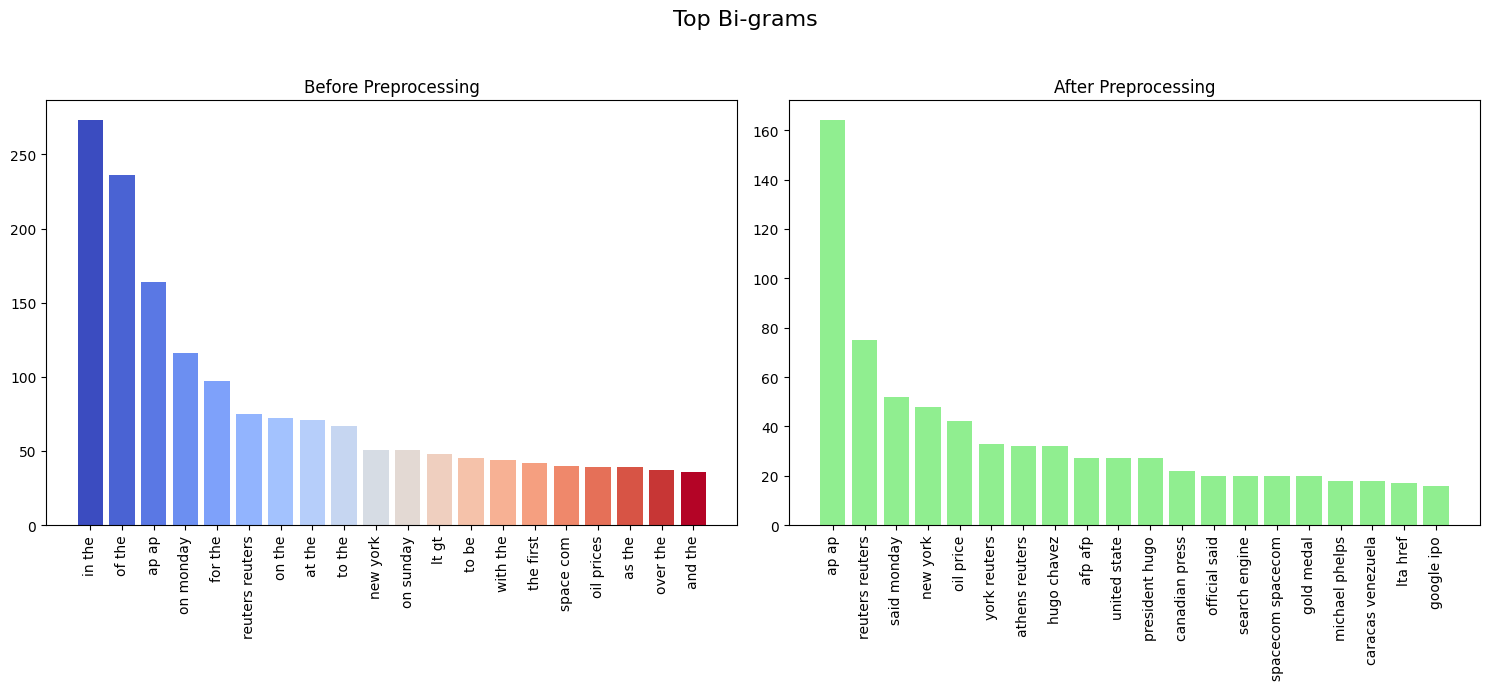

In [40]:
visualize_frequency(df)

We obviously can see that after the preprocessing steps and the using of stop_words argument into the initialization of the CountVectorizer the labels depicted change completely and better represent the key theme of the dataset



### **TF-IDF Explained with Math Notation**

**TF-IDF (Term Frequency-Inverse Document Frequency)**  
TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection (corpus). 

---

**1. Term Frequency (TF)**  
The frequency of a term in a document.

$TF(t, d) = \frac{f_{t,d}}{|d|}$

- $f_{t,d}$: Number of times term $t$ appears in document $d$  
- $|d|$: Total number of terms in document $d$  

**Intuition:** A term appearing frequently in a document is more important, but common terms need adjustment.

---

**2. Inverse Document Frequency (IDF)**  
A measure of how unique a term is across the entire document collection.

$IDF(t) = \log\left(\frac{N}{1 + df(t)}\right)$

- $N$: Total number of documents in the collection  
- $df(t)$: Number of documents containing term $t$  

**Intuition:** Rare terms across documents have higher importance.

---

**3. TF-IDF Score**  
Combining TF and IDF gives us the final importance score of a term in a document.

$TFIDF(t, d) = TF(t, d) \cdot IDF(t)$

- A higher TF-IDF score indicates a more significant term in the context of the document and corpus.

---

**4. Key Steps for Computing TF-IDF:**
1. Calculate TF for each term in a document.  
2. Calculate IDF for each term in the corpus.  
3. Compute the TF-IDF score by multiplying TF and IDF.  

$TFIDF(t, d) = \frac{f_{t,d}}{|d|} \cdot \log\left(\frac{N}{1 + df(t)}\right)$

**Inverted Index with TF-IDF Example:**

$\textbf{term}_1: [(d_1, TFIDF_{t_1, d_1}), (d_2, TFIDF_{t_1, d_2}), \ldots]$

**Intuition:** Higher TF-IDF → More relevant term in a specific document.


In [56]:
import math
import json
from collections import defaultdict

# Manual TF-IDF Implementation
df_tfidf = df.copy() # Copy DataFrame to avoid modifying the original one

# Vocabulary Mapping (Word → Unique ID)
unique_words = set(word for text in df_tfidf['cleaned_text'] for word in text.split())
vocabulary = {word: idx for idx, word in enumerate(unique_words)}

total_documents = len(df_tfidf)

updated_inverted_index = defaultdict(list)

# TF-IDF Calculation
for term, term_id in vocabulary.items(): # iterate over the vocabulary
    document_frequency = 0
    
    for doc_id, doc in enumerate(df_tfidf['cleaned_text']): # iterate over the documents
        term_count = doc.split().count(term) # count the term occurrences in the document
        doc_length = len(doc.split()) # get the document length
        
        if term_count > 0: # if the term occurs in the document
            document_frequency += 1 
            tf = term_count / doc_length # calculate term frequency
            idf = math.log(total_documents / (1 + document_frequency)) # calculate inverse document frequency
            tf_idf = tf * idf # calculate TF-IDF score
            
            updated_inverted_index[term].append((doc_id, tf_idf)) # Update Inverted Index

with open("updated_inverted_index.json", "w") as file:
    json.dump(updated_inverted_index, file, indent=4)

print("\n✅ Updated Inverted Index saved as 'updated_inverted_index.json'")
print("\nVocabulary Mapping:")
print(vocabulary)




✅ Updated Inverted Index saved as 'updated_inverted_index.json'

Vocabulary Mapping:
{'oracle': 0, 'guarded': 1, 'mandated': 2, 'snack': 3, 'directly': 4, 'kashmir': 5, 'particle': 6, 'leadership': 7, 'toresults': 8, 'environmentalist': 9, 'excludes': 10, 'forge': 11, 'nightmare': 12, 'serversserver': 13, 'tableside': 14, 'housing': 15, 'ntt': 16, 'charles': 17, 'transportation': 18, 'martinez': 19, 'metro': 20, 'face': 21, 'declined': 22, 'pitched': 23, 'slope': 24, 'review': 25, 'recommendation': 26, 'close': 27, 'oldsmobile': 28, 'puppet': 29, 'owl': 30, 'any': 31, 'targetstocksquickinfofullquotegtnttoltagt': 32, 'sans': 33, 'favorite': 34, 'overtake': 35, '3670000': 36, 'cable': 37, 'jarno': 38, 'la': 39, 'entry': 40, 'manner': 41, 'tax': 42, 'deep': 43, 'sound': 44, 'palestinianprisoners': 45, 'kashmiri': 46, 'everton': 47, 'sanctuary': 48, 'bay': 49, 'stability': 50, 'privilege': 51, 'harvard': 52, 'eliminated': 53, 'helping': 54, 'bermudabased': 55, 'circling': 56, 'accusing': 

Using library it become even easier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Vocabulary Mapping
vocabulary = vectorizer.vocabulary_
tfidf_feature_names = vectorizer.get_feature_names_out()

# Display Vocabulary and TF-IDF Matrix
print("\nVocabulary Mapping:")
print(vocabulary)

#print("\nTF-IDF Matrix:")
#pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

##### 📚 **Cosine Similarity**

Cosine similarity is a metric used to measure how similar two vectors are, based on the **cosine of the angle** between them. It is commonly used in text analysis, especially for comparing **TF-IDF vectors**.

---

🧠 **Mathematical Formula**

The formula for **Cosine Similarity** between a **query vector** $q$ and a **document vector** $d$ is:

$$
\text{Cosine Similarity} = \frac{\sum_{i=1}^{n} q_i \cdot d_i}{\sqrt{\sum_{i=1}^{n} q_i^2} \cdot \sqrt{\sum_{i=1}^{n} d_i^2}}
$$

Where:  
- $q_i$ = Value of the **i-th term** in the **query vector**  
- $d_i$ = Value of the **i-th term** in the **document vector**  
- $\sum_{i=1}^{n} q_i \cdot d_i$ = **Dot product** of the two vectors  
- $\sqrt{\sum_{i=1}^{n} q_i^2}$ = **Magnitude of the query vector**  
- $\sqrt{\sum_{i=1}^{n} d_i^2}$ = **Magnitude of the document vector**

---

⚠️ **Edge Case Handling**

If the magnitude of either vector is zero:

$$
\text{Cosine Similarity} = 0
$$

This prevents **division by zero** errors.

---

🚀 **Interpretation of the Result**
- **1:** Vectors are identical (maximum similarity).  
- **0:** Vectors are orthogonal (no similarity).  
- **-1:** Vectors are diametrically opposite (maximum dissimilarity, uncommon in text mining).

The closer the **Cosine Similarity score** is to **1**, the more relevant the document is to the query.


In [55]:
#from sklearn.metrics.pairwise import cosine_similarity

# Function to Calculate Cosine Similarity
def cosine_similarity(query_vector, doc_vector):
    dot_product = sum(q * d for q, d in zip(query_vector, doc_vector)) # calculate the dot product of the query and document vectors
    query_magnitude = math.sqrt(sum(q**2 for q in query_vector)) # calculate the magnitude of the query vector
    doc_magnitude = math.sqrt(sum(d**2 for d in doc_vector)) # calculate the magnitude of the document vector
    
    if query_magnitude == 0 or doc_magnitude == 0: # if the magnitude is 0, return 0 to avoid division by zero
        return 0.0
    
    return dot_product / (query_magnitude * doc_magnitude) # return the cosine similarity score


In [53]:
# Ranked Search Function
def ranked_query(query, vocabulary, inverted_index, df, top_k=5):
    query_terms = query.lower().split() # tokenize and lowercase the query
    query_vector = [0] * len(vocabulary) # initialize the query vector
    
    # Build Query Vector
    for term in query_terms: # iterate over the query terms
        if term in vocabulary: # if the term is in the vocabulary
            term_id = vocabulary[term] # get the term ID
            query_vector[term_id] += 1 # increment the term frequency in the query vector
    
    # Convert query term counts to TF-IDF
    query_vector = [ 
        (count / len(query_terms)) * math.log(total_documents / (1 + len(inverted_index.get(term, []))))
        if count > 0 else 0
        for term, count in zip(vocabulary.keys(), query_vector)
    ] # calculate TF-IDF for each term in the query
    
    # Calculate Cosine Similarity for Each Document
    similarity_scores = []
    for doc_id in range(len(df)): # iterate over the documents
        doc_vector = [0] * len(vocabulary) # initialize the document vector
        
        for term, postings in inverted_index.items(): # iterate over the inverted index
            for posting_doc_id, tfidf in postings: # iterate over the posting list
                if posting_doc_id == doc_id: # if the document ID matches
                    term_id = vocabulary[term] # get the term ID
                    doc_vector[term_id] = tfidf # set the TF-IDF score in the document vector
        
        score = cosine_similarity(query_vector, doc_vector) 
        if score > 0: # if the similarity score is positive 
            similarity_scores.append((doc_id, score)) # add the document ID and score to the list
    
    # Sort by Similarity Score
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[:top_k] 
    
    # Retrieve Results
    results = []
    for doc_id, score in similarity_scores:
        results.append({
            "Document ID": doc_id,
            "Cleaned Text": df['cleaned_text'].iloc[doc_id],
            "Similarity Score": score
        })
    
    return results

In [60]:
query = "machine learning"
results = ranked_query(query, vocabulary, updated_inverted_index, df, top_k=5)

print("\n🔍 Top-k Ranked Query Results:")
for res in results:
    print(f"\nDocument ID: {res['Document ID']}")
    print(f"Cleaned Text: {res['Cleaned Text']}")
    print(f"Similarity Score: {res['Similarity Score']:.4f}")



🔍 Top-k Ranked Query Results:

Document ID: 196
Cleaned Text: playstation potential learning playstation game console could developed learning tool child say northumberland head teacher
Similarity Score: 0.3779

Document ID: 308
Cleaned Text: vending machine making room healthy product ira dreyfus washington ap typical vending machine fare consists chocolate bar potato chip leaving option people seeking lowcalorie lowsalt snack changing company develop market product expect satisfy nutritionist consumer
Similarity Score: 0.1991

Document ID: 1127
Cleaned Text: microsoft delay automatic xp sp2 delivery san francisco microsoft corp pushed back automatic distribution window xp service pack 2 sp2 allow business user time instruct machine skip update
Similarity Score: 0.1167

Document ID: 170
Cleaned Text: blog time machine i am starting realize blog bit time machine example ican create blog entry warn something happen thefuture my current ntp blog entry good example wrote asmuch people re